Title: Analyzing Liverpool and Manchester City's 2018/19 Premier League Season

As a Liverpool FC fan, the 2018/19 Premier League was one of the most frustrating title races to follow. Manchester City and Liverpool had near perfect seasons both achieving over 95 points by the season's end which had never been done before. We missed out by one point despite only having 1 loss in all 38 games, with 3rd place Chelsea finishing a ridiculous 25 points behind Liverpool. As such, I've decided to do my final project on the 2018/19 season's data and try to extract as many useful insights regarding weaknesses or strengths between the different clubs when it comes to goals, assists, minutes, diversity of age groups, nationalities and differences in home and away statistics.

In [7]:
# importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# reading in the dataset
players = pd.read_csv("/Users/mefleh/Desktop/DSE510_finalproject/epl201819_players.csv")
# slicing to extract desired columns
players = players.iloc[:, :31]
# renaming columns
players.rename(columns={'full_name': 'name', 'Current Club': 'club'}, inplace=True)
players.columns = players.columns.str.replace('_overall', '')
players.columns

Index(['name', 'age', 'birthday', 'birthday_GMT', 'league', 'season',
       'position', 'club', 'minutes_played', 'minutes_played_home',
       'minutes_played_away', 'nationality', 'appearances', 'appearances_home',
       'appearances_away', 'goals', 'goals_home', 'goals_away', 'assists',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets', 'clean_sheets_home', 'clean_sheets_away', 'conceded',
       'conceded_home', 'conceded_away', 'yellow_cards', 'red_cards'],
      dtype='object')

In [48]:
# adding p/ Match columns for goals, assists, minutes played etc.

players['minutes_per_match'] = players['minutes_played'] / players['appearances'].astype(float)
players['goals_per_match'] = players['goals'] / players['appearances'].astype(float)
players['assists_per_match'] = players['assists'] / players['appearances'].astype(float)
players['conceded_per_match'] = players['conceded'] / players['appearances'].astype(float)
players['yellow_cards_per_match'] = players['yellow_cards'] / players['appearances'].astype(float)
players['red_cards_per_match'] = players['red_cards'] / players['appearances'].astype(float)

players['minutes_per_match_home'] = players['minutes_played_home'] / players['appearances_home'].astype(float)
players['goals_per_match_home'] = players['goals_home'] / players['appearances_home'].astype(float)
players['assists_per_match_home'] = players['assists_home'] / players['appearances_home'].astype(float)
players['conceded_per_match_home'] = players['conceded_home'] / players['appearances_home'].astype(float)

players['minutes_per_match_away'] = players['minutes_played_away'] / players['appearances_away'].astype(float)
players['goals_per_match_away'] = players['goals_away'] / players['appearances_away'].astype(float)
players['assists_per_match_away'] = players['assists_away'] / players['appearances_away'].astype(float)
players['conceded_per_match_away'] = players['conceded_away'] / players['appearances_away'].astype(float)

In [54]:
# creating sets for players and team names
team_names = set(players['club'])
player_names = set(players['name'])

In [57]:
# keeping only Liverpool and Manchester City data
lfcmcfc = players[players['club'].isin(['Liverpool', 'Manchester City'])]
lfcmcfc_names = set(lfcmcfc['name'])
lfcmcfc_names

{'Adam Lallana',
 'Alberto Moreno',
 'Alex Oxlade-Chamberlain',
 'Alisson Becker',
 'Andrew Robertson',
 'Arijanet Muric',
 'Aymeric Laporte',
 'Benjamin Mendy',
 'Bernardo Silva',
 'Claudio Bravo',
 'Curtis Jones',
 'Daniel Sturridge',
 'Danilo',
 'David Silva',
 'Dejan Lovren',
 'Divock Origi',
 'Ederson',
 'Fabian Delph',
 'Fabinho',
 'Fernandinho',
 'Gabriel Jesus',
 'Georginio Wijnaldum',
 'James Milner',
 'Joe Gomez',
 'Joel Matip',
 'John Stones',
 'Jordan Henderson',
 'Kevin De Bruyne',
 'Kyle Walker',
 'Leroy Sané',
 'Loris Karius',
 'Mohamed Salah',
 'Naby Keïta',
 'Nicolas Otamendi',
 'Oleksandr Zinchenko',
 'Phil Foden',
 'Philippe Sandler',
 'Rafael Euclides Soares Camacho',
 'Raheem Sterling',
 'Riyad Mahrez',
 'Roberto Firmino',
 'Sadio Mané',
 'Sergio Aguero',
 'Simon Mignolet',
 'Trent Alexander-Arnold',
 'Vincent Kompany',
 'Virgil van Dijk',
 'Xherdan Shaqiri',
 'İlkay Gündoğan'}

Let's create some visualizations for some basic metrics such as total goals, penalty goals, highest number goals and highest average number of goals per game.

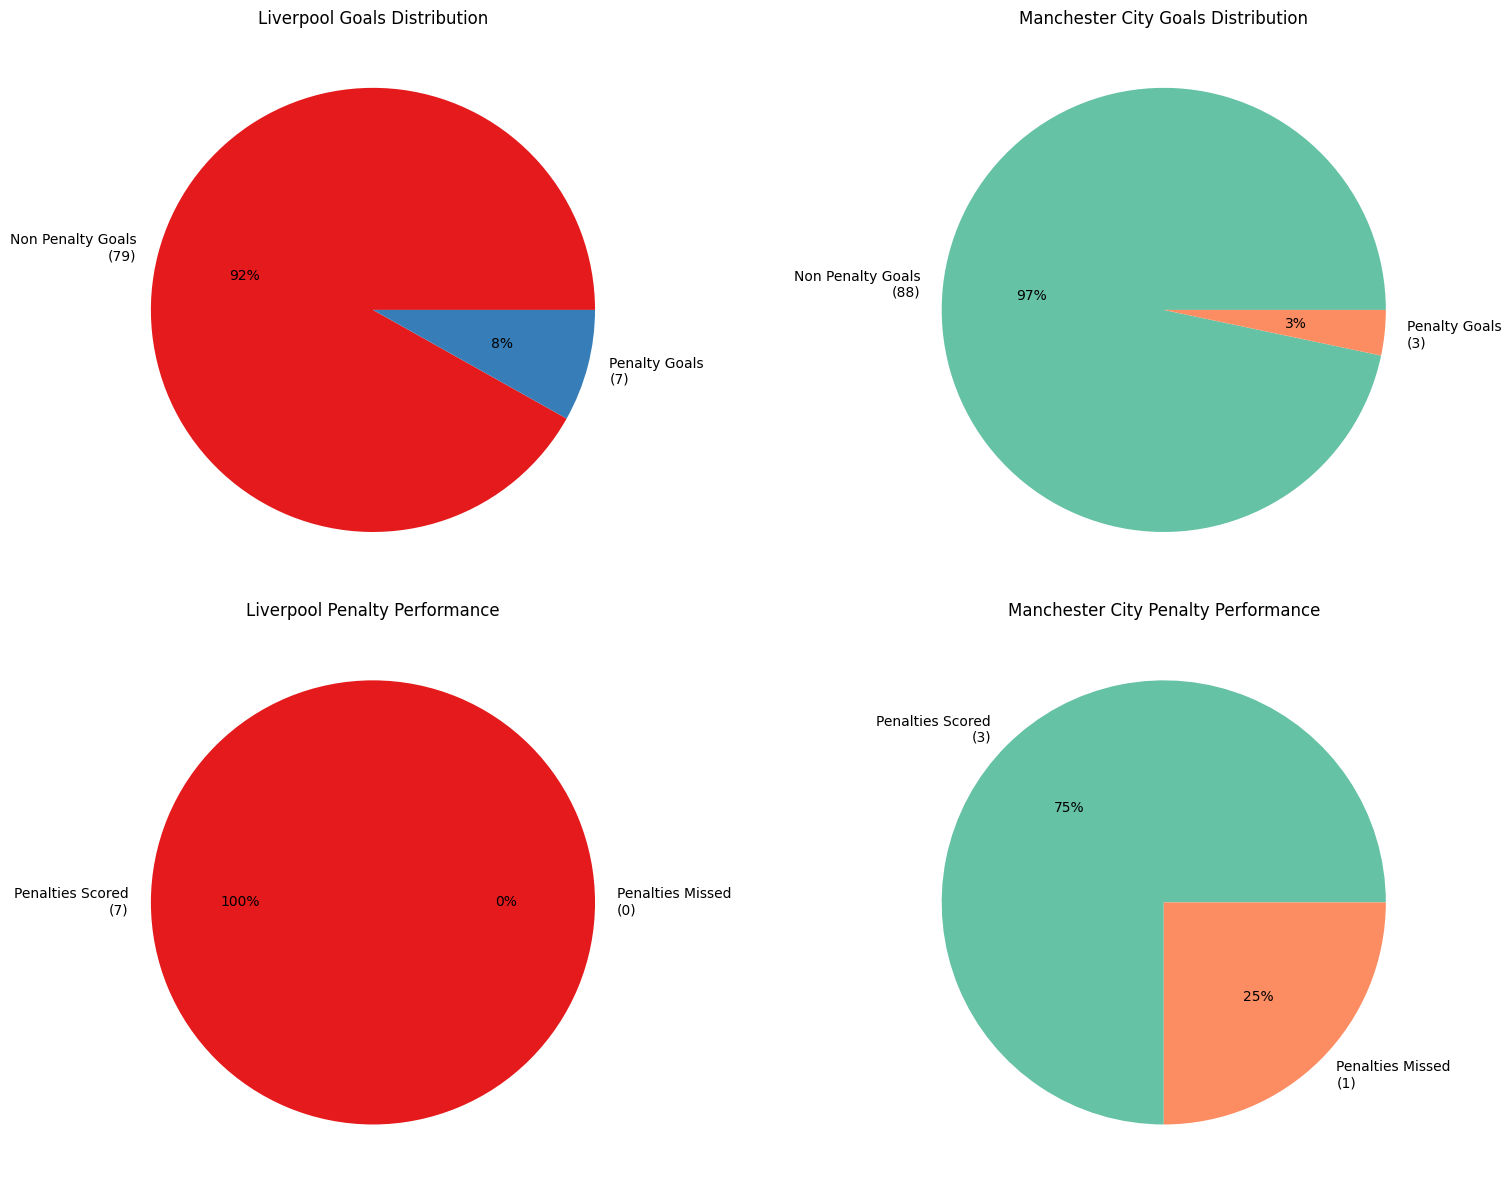

In [66]:
# total goals by club
lfc_totalgoals = lfcmcfc[lfcmcfc['club'] == 'Liverpool']['goals'].sum()
lfc_penaltygoals = lfcmcfc[lfcmcfc['club'] == 'Liverpool']['penalty_goals'].sum()
lfc_penaltymisses = lfcmcfc[lfcmcfc['club'] == 'Liverpool']['penalty_misses'].sum()
lfc_nonpenalty_goals = lfc_totalgoals - lfc_penaltygoals

mcfc_totalgoals = lfcmcfc[lfcmcfc['club'] == 'Manchester City']['goals'].sum()
mcfc_penaltygoals = lfcmcfc[lfcmcfc['club'] == 'Manchester City']['penalty_goals'].sum()
mcfc_penaltymisses = lfcmcfc[lfcmcfc['club'] == 'Manchester City']['penalty_misses'].sum()
mcfc_nonpenalty_goals = mcfc_totalgoals - mcfc_penaltygoals

# creating side by side pie charts comparing percentage of penalty goals as well as penalty success rate
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

lfc_labels1 = ['Non Penalty Goals\n({})'.format(lfc_nonpenalty_goals), 'Penalty Goals\n({})'.format(lfc_penaltygoals)]
lfc_labels2 = ['Penalties Scored\n({})'.format(lfc_penaltygoals), 'Penalties Missed\n({})'.format(lfc_penaltymisses)]

axs[0, 0].pie([lfc_nonpenalty_goals, lfc_penaltygoals], labels=lfc_labels1, colors=sns.color_palette('Set1'), autopct='%1.0f%%')
axs[0, 0].set_title('Liverpool Goals Distribution')

axs[1, 0].pie([lfc_penaltygoals, lfc_penaltymisses], labels=lfc_labels2, colors=sns.color_palette('Set1'), autopct='%1.0f%%')
axs[1, 0].set_title('Liverpool Penalty Performance')

mcfc_labels1 = ['Non Penalty Goals\n({})'.format(mcfc_nonpenalty_goals), 'Penalty Goals\n({})'.format(mcfc_penaltygoals)]
mcfc_labels2 = ['Penalties Scored\n({})'.format(mcfc_penaltygoals), 'Penalties Missed\n({})'.format(mcfc_penaltymisses)]

axs[0, 1].pie([mcfc_nonpenalty_goals, mcfc_penaltygoals], labels=mcfc_labels1, colors=sns.color_palette('Set2'), autopct='%1.0f%%')
axs[0, 1].set_title('Manchester City Goals Distribution')

axs[1, 1].pie([mcfc_penaltygoals, mcfc_penaltymisses], labels=mcfc_labels2, colors=sns.color_palette('Set2'), autopct='%1.0f%%')
axs[1, 1].set_title('Manchester City Penalty Performance')

plt.tight_layout()
plt.show()

As we can see, Liverpool benefitted more from penalty decisions throughout the season, having been awarded 7 penalties to City's 4. Liverpool were also far more efficient with their penalties as they saw a success rate of 100% from the spot whereas City only magaed 75% (on fewer attempts). However, Manchester City were more successful in scoring from open play and non-penalty set-pieces which allowed them to score 5 more goals throughout the season in total. These preliminary findings indicate that penalties were not a major factor in this title race, despite City's inefficiency from the spot.

Now, let's look at how many goals each unique position contributed to their team's total goals. While defenders and defensive midfielders aren't expected to produce anywhere near as many goals as the rest of the team, the distriubtion of goals between the positions can indicate the playstyle of the team in terms of whether they're allowing all players to get involved or heavily relying on the rest of the team to provide for the forwards and attacking midfielders.

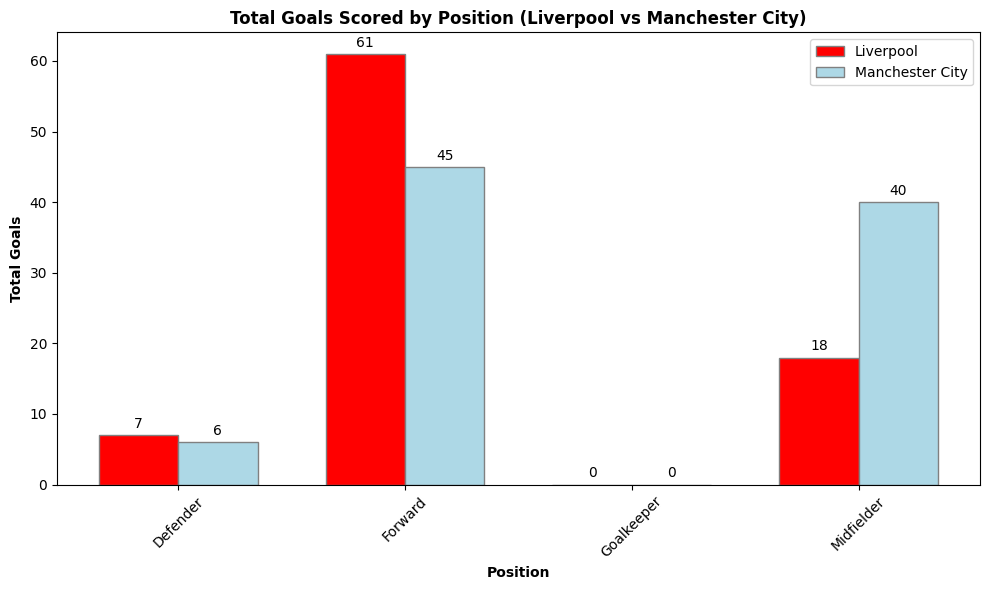

In [75]:
# calculating total goals scored by each position
lfc_position_goals = lfcmcfc[lfcmcfc['club'] == 'Liverpool'].groupby('position')['goals'].sum()
mcfc_position_goals = lfcmcfc[lfcmcfc['club'] == 'Manchester City'].groupby('position')['goals'].sum()

# unique positions
position_order = ['Defender', 'Forward', 'Goalkeeper', 'Midfielder']

# plotting data
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(position_order))
r2 = [x + bar_width for x in r1]
bars1 = ax.bar(r1, lfc_position_goals.reindex(position_order, fill_value=0), color='red', width=bar_width, edgecolor='grey', label='Liverpool')
bars2 = ax.bar(r2, mcfc_position_goals.reindex(position_order, fill_value=0), color='lightblue', width=bar_width, edgecolor='grey', label='Manchester City')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Position', fontweight='bold')
ax.set_ylabel('Total Goals', fontweight='bold')
ax.set_title('Total Goals Scored by Position (Liverpool vs Manchester City)', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(position_order))])
ax.set_xticklabels(position_order)
ax.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It's evident, from the data alone, that Manchester City relies more heavily on their midfielders to contribute to their goals than Liverpool does. This is shown by the disparity in the number goals in Liverpool's favor when it comes to goals scored by forwards. However, this can be explained by Manchester City's manager's playstyle (Pep Guardiola). Pep is known to manage with a rotation policy, utilizing as many players and formations as needed throughout the season to overcome their opponents. He's more keen on using the forwards to create space for midfielders to penetrate defensive lines, especially with the number of quality players Manchester City posseses in midfield. Jurgen Klopp, Liverpool's manager, on the other hand, has a more traditional approach where he utilizes the same formation and players while relying a little more on individual brilliance from his forwards with midfielders more focused on high pressing to release the forwards. There doesn't seem to be a distinguishable difference in defensive goal contributions between the two teams. Again, similar to the pie charts above, Manchester City was able to close the gap between the forwards' goal contributions by putting more responsibility on the midfielders.

Next, we'll look at making a normal distribution for each squad's players' ages. This should help us identify key differences in the structure of the squad.

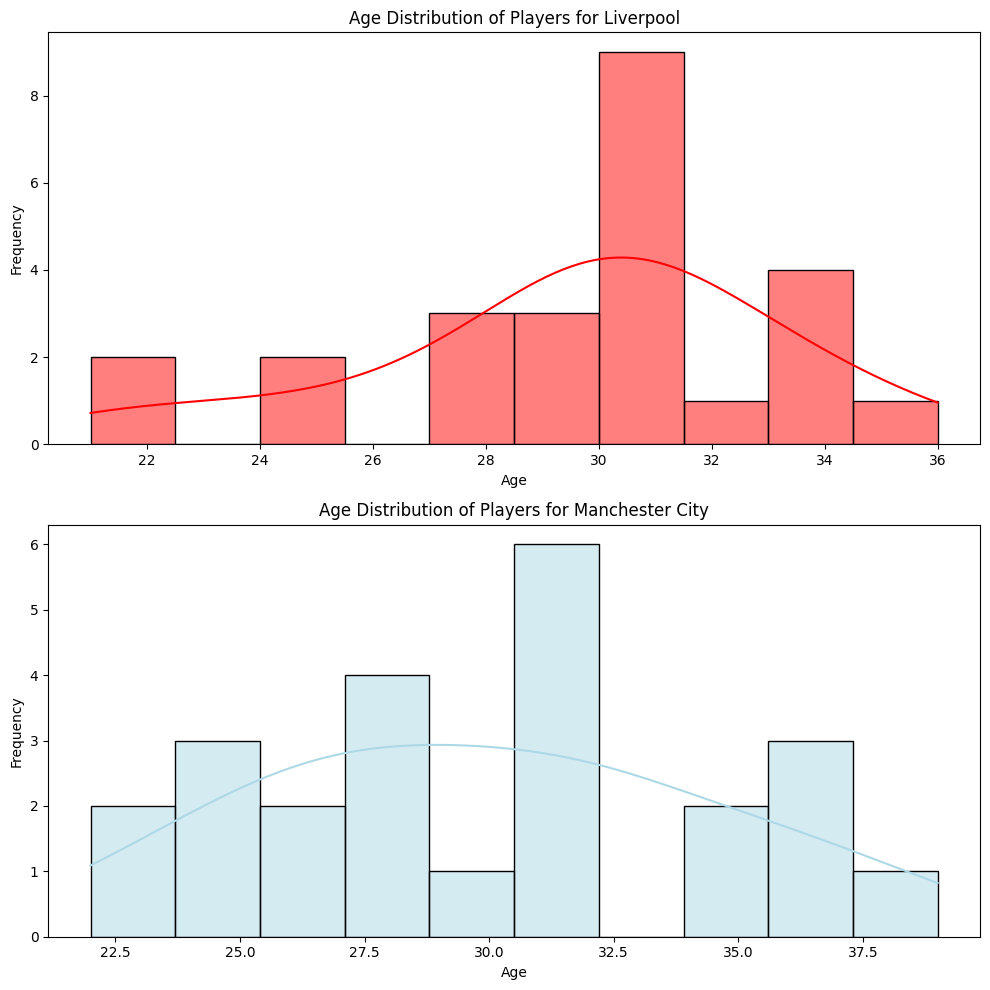

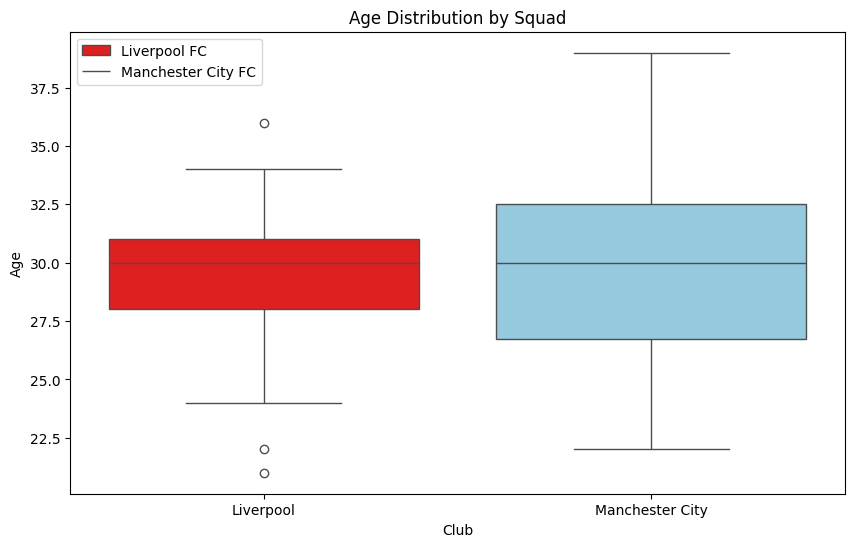

In [93]:
# plotting age data
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=lfcmcfc[lfcmcfc['club'] == 'Liverpool'], x='age', bins=10, kde=True, color='red', ax=axes[0])
axes[0].set_title('Age Distribution of Players for Liverpool')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=lfcmcfc[lfcmcfc['club'] == 'Manchester City'], x='age', bins=10, kde=True, color='lightblue', ax=axes[1])
axes[1].set_title('Age Distribution of Players for Manchester City')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='club', y='age', hue='club', data=lfcmcfc, palette=['red', 'skyblue'], dodge=False)
plt.title('Age Distribution by Squad')
plt.xlabel('Club')
plt.ylabel('Age')
plt.legend(title=None, labels=['Liverpool FC', 'Manchester City FC'])
plt.show()

Playing in a league is very different from other competitions with elimination games as it is likened more to running a marathon than sprinting. Getting the better of the other 19 teams over the course of 38 games requires consistency and a deep enough squad to carry the burden of their heavy playing schedules. We can see from the distriubtions that Pep opted to build an overall younger squad than Klopp, who is more reliant on bringing experienced players into the team to push forward. What the distributions don't show is the context behind these differences which can mainly be attributed to budget caps. Manchester City is owned by an oil tycoon who is willing to invest vast amounts of money on bringing in players while Liverpool is run in a more financially efficient manner, focusing more on bringing in players showing potential and developing them. As such, these budget differences have allowed Manchester City to recruit younger players who are regularly scouted by other European giants, whereas Liverpool have focused on players with contracts that have run out or are towards the end of their careers such as James Milner, Alex Oxlade-Chamberlain and Shaqiri. It is possible that Manchester City's younger squad might have played a role in them being able to be more consistent over the course of those 38 matches, compared to Liverpool. However, this is speculative and cannot be determined by these distributions alone but it helps to visualize as many metrics related to these two squads as we can to try and identify how Liverpool might've fallen short that season.

We will now look at the diversity of the two squads when it comes to nationality and each continent's contribution to goals and assists. Different regions have varying philosophies when it comes to training their youth and as a result, it allows us viewers to enjoy a myriad of playing styles and approaches when watching the Premier League. Here, I want to see you who relies more on "traditional" European trained players and who has taken a bigger chance on the raw talents of South America; since these two continents make up the majority of players throughout the top 5 European leagues.

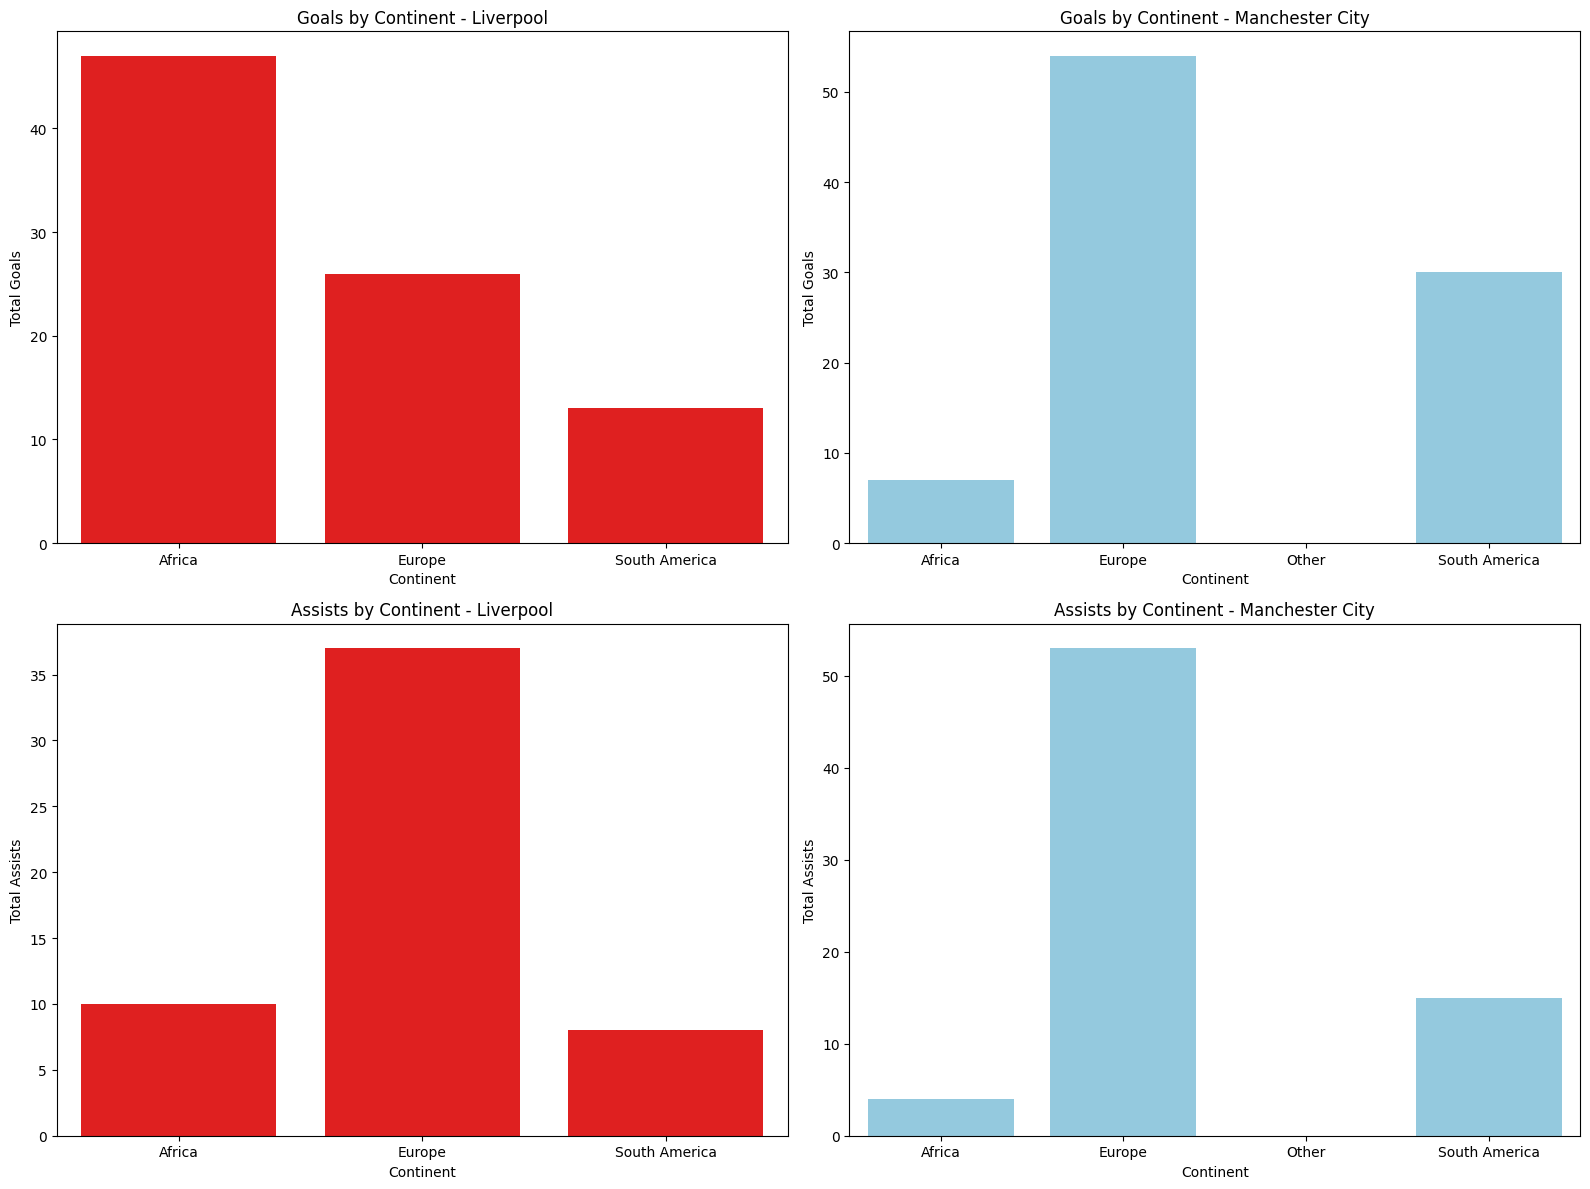

In [105]:
# mapping continents to countries
continent_mapping = {
    'Europe': ['England', 'Scotland', 'France', 'Portugal', 'Spain', 'Belgium', 'Netherlands', 'Germany', 'Croatia', 'Ukraine', 'Switzerland'],
    'South America': ['Brazil', 'Chile', 'Argentina'],
    'Africa': ['Egypt', 'Guinea', 'Cameroon', 'Senegal', 'Algeria']
}

# mapping nationality to continent
def map_to_continent(nationality):
    for continent, countries in continent_mapping.items():
        if nationality in countries:
            return continent
    return 'Other'

lfcmcfc = lfcmcfc.copy()
lfcmcfc['continent'] = lfcmcfc['nationality'].apply(map_to_continent)

# calculating total goals and assists by continent
continent_stats = lfcmcfc.groupby(['continent', 'club']).agg({'goals': 'sum', 'assists': 'sum'}).reset_index()

# plotting data
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(data=continent_stats[continent_stats['club'] == 'Liverpool'], x='continent', y='goals', color='red', ax=axs[0, 0])
axs[0, 0].set_title('Goals by Continent - Liverpool')
axs[0, 0].set_xlabel('Continent')
axs[0, 0].set_ylabel('Total Goals')

sns.barplot(data=continent_stats[continent_stats['club'] == 'Manchester City'], x='continent', y='goals', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Goals by Continent - Manchester City')
axs[0, 1].set_xlabel('Continent')
axs[0, 1].set_ylabel('Total Goals')

# Assists by continent for Liverpool and Manchester City
sns.barplot(data=continent_stats[continent_stats['club'] == 'Liverpool'], x='continent', y='assists', color='red', ax=axs[1, 0])
axs[1, 0].set_title('Assists by Continent - Liverpool')
axs[1, 0].set_xlabel('Continent')
axs[1, 0].set_ylabel('Total Assists')

sns.barplot(data=continent_stats[continent_stats['club'] == 'Manchester City'], x='continent', y='assists', color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Assists by Continent - Manchester City')
axs[1, 1].set_xlabel('Continent')
axs[1, 1].set_ylabel('Total Assists')

plt.tight_layout()
plt.show()

These findings are not a suprirse as we mentioned earlier how much Liverpool relies on their forwards when it comes to scoring goals and two of their 3 main forwards are African players; Mohammed Salah (Egypt) and Sadio Mane (Senegal). Liverpool's regular starting midfield and full-backs mostly consists of European players such Jordan Henderson (England), James Milner (England), Trent Alexander-Arnold (England) and Andrew Robertson (Scotland). These players' positions are responsible for providing their forwards with opportunities and this supports our earlier claim that Klopp relies on them to do so while Pep is more keen on his midfielders picking up the slack. Manchester City's midfield consists of mostly European players such as Kevin De Bruyne (Belgium), Bernardo Silva (Portugal) and David Silva (Spain) while their two strikers (Central Forwards) are both South American; Gabriel Jesus (Brazil) and Sergio Aguero (Argentina). As such, Manchester City's plots confirms their distribution of goals as their predominantly European midfield is resposible for the majority of goals and assists on the team. We can also see that African players play a minor role in these statistics which has caused Pep some skepticism throughout his career. However, Pep has still managed to outperform most teams during his tenure as Manchester City's manager despite this.

Now let's look at differences in home and away performances between the two teams

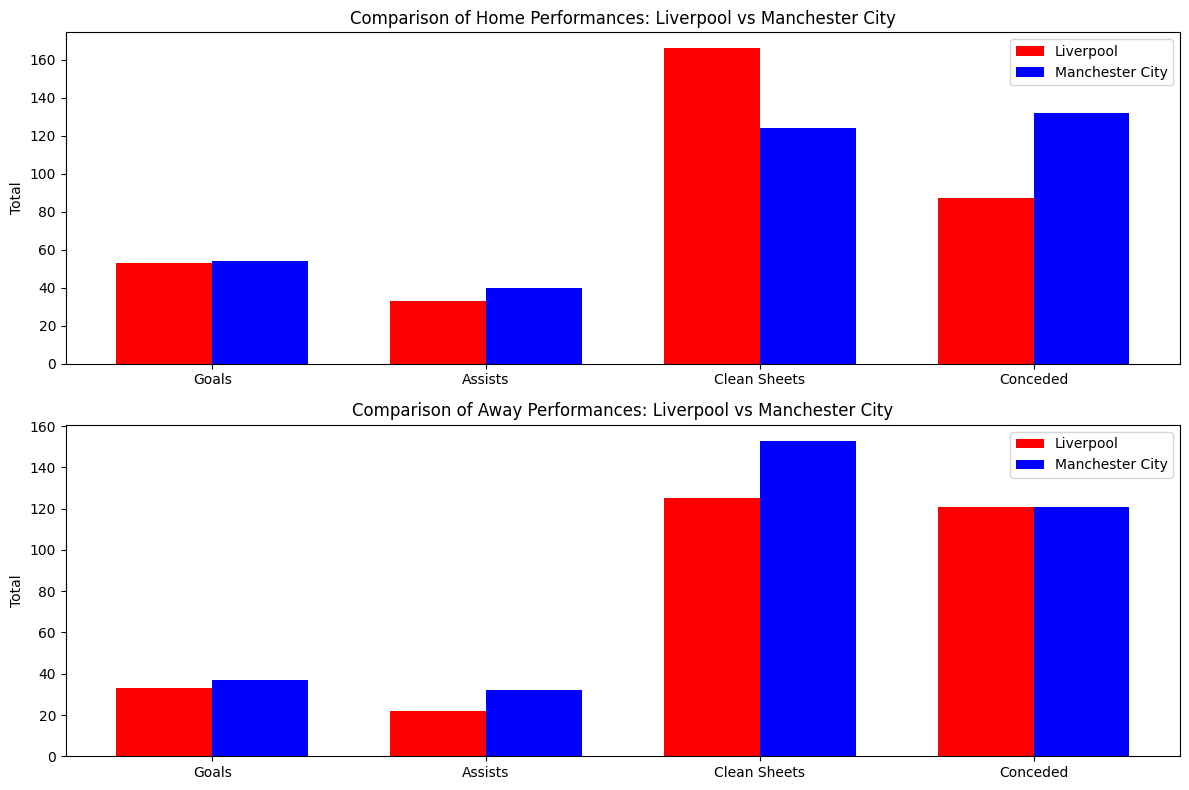

In [103]:
liverpool_home = lfcmcfc[lfcmcfc['club'] == 'Liverpool']
manchester_city_home = lfcmcfc[lfcmcfc['club'] == 'Manchester City']
liverpool_away = lfcmcfc[lfcmcfc['club'] == 'Liverpool']
manchester_city_away = lfcmcfc[lfcmcfc['club'] == 'Manchester City']

metrics = ['Goals', 'Assists', 'Clean Sheets', 'Conceded']
index = np.arange(len(metrics))
bar_width = 0.35

# plotting data
plt.figure(figsize=(12, 8))

# home
plt.subplot(2, 1, 1)
plt.bar(index, liverpool_home[['goals_home', 'assists_home', 'clean_sheets_home', 'conceded_home']].sum(), bar_width, label='Liverpool', color='r')
plt.bar(index + bar_width, manchester_city_home[['goals_home', 'assists_home', 'clean_sheets_home', 'conceded_home']].sum(), bar_width, label='Manchester City', color='b')
plt.title('Comparison of Home Performances: Liverpool vs Manchester City')
plt.ylabel('Total')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# away
plt.subplot(2, 1, 2)
plt.bar(index, liverpool_away[['goals_away', 'assists_away', 'clean_sheets_away', 'conceded_away']].sum(), bar_width, label='Liverpool', color='r')
plt.bar(index + bar_width, manchester_city_away[['goals_away', 'assists_away', 'clean_sheets_away', 'conceded_away']].sum(), bar_width, label='Manchester City', color='b')
plt.title('Comparison of Away Performances: Liverpool vs Manchester City')
plt.ylabel('Total')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.tight_layout()
plt.show()

We can see that Liverpool were defensively superior at home having been able to rack up more clean sheets than City and conceding approxiamtely 20 less goals but fell a little short when playing away. In fact, Liverpool's inability to win the league that season can be heavily attributed to the number of draws they suffered despite only losing one game. Liverpool drew a total of 7 games through the season, with 5 of them coming in away matches where they were evidently unable to match the same number of clean sheets they had at home.

Conclusion: Despite the disappointment I experienced at the end of the 2018/19 season and seeing my team miss out by a single point, it is evident from this data analysis that there weren't significant differences between these two teams' stats with regards to goals scored, assists, goals conceded and clean sheets. It would be great to be able to identify a specific statistical shortcoming on Liverpool's behalf that would explain this outcome but it was simply two squads in their prime with it possibly going either way. 
Both teams peformed at an elite level throughout the 38 games and Liverpool simply missed out due to their stretch of draws away from home where a single gooal in any of those 7 matches would've seen Liverpool end the season with 99 points, 1 above city.

Key Findings:
    - Manchester City was more successful in scoring open play and non-penalty goals throughout the season but Liverpool was able to shorten the gap due to their 100% conversion rate from the spot.
    - Liverpool's squad is more compact in terms of age where the majority of their players are in their late 20s - early 30s as opposed to Manchester City with a wider range of ages which could've played a role in their triumph, since having a good balance between young but fresh players and less atheltic experienced players is essential.
    - Pep relies more on goal and assist contributions from the European academy-trained players within his squad as opposed to Klopp, who's success at Liverpool can be mostly attributed to African players Mohammed Salah and Sadio Mane's individual performances in their front three and wants his midfield to be providers for them rather than venture forward and risk exposing the back line
    - Liverpool's form away from home wasn't up to the standards of their home performances and may have cost them the title as 71.4% of their draws were at opponents' grounds